# Linear Regression

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
df=fetch_california_housing()

In [4]:
df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [9]:
dataset=pd.DataFrame(df.data, columns=df.feature_names)

In [10]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [11]:
X=dataset.iloc[:,:-1]    #independent feature
y=dataset.iloc[:,-1]      #dependent feature

In [13]:
X                     #getten the list of independent features

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43


In [14]:
y                     #getten the list of dependent features

0       -122.23
1       -122.22
2       -122.24
3       -122.25
4       -122.25
          ...  
20635   -121.09
20636   -121.21
20637   -121.22
20638   -121.32
20639   -121.24
Name: Longitude, Length: 20640, dtype: float64

In [16]:
from sklearn.linear_model import LinearRegression

In [21]:
regressor=LinearRegression()
regressor

LinearRegression()

In [18]:
from sklearn.model_selection import cross_val_score

In [23]:
mse=cross_val_score(regressor,X,y,scoring='neg_mean_squared_error',cv=5)

In [24]:
mse

array([-0.57032697, -0.17168646, -0.42034969, -0.42960301, -0.97292044])

In [25]:
np.mean(mse)

-0.5129773131004002

From linear regression algorithm we get cost function ot theta = -0.5129773131004002

# Ridge Regression

In [26]:
from sklearn.linear_model import Ridge

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
ridge=Ridge()
ridge

Ridge()

In [30]:
#for lambda
parameters={'alpha':[1e-15, 1e-3, 1e-2, 1,5,10,20,30,40,50]}

In [34]:
ridge_regressor=GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5, verbose=1)

In [35]:
ridge_regressor.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 0.001, 0.01, 1, 5, 10, 20, 30, 40,
                                   50]},
             scoring='neg_mean_squared_error', verbose=1)

In [36]:
#DETERMINING which lambda got selected from parameters
print(ridge_regressor.best_params_)

{'alpha': 1e-15}


In [37]:
print(ridge_regressor.best_score_)

-0.5129773131004034


# Lasso Regression

In [38]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

G:\ANACONDA\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.003e+03, tolerance: 6.300e+00
  model = cd_fast.enet_coordinate_descent(
G:\ANACONDA\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.855e+03, tolerance: 7.283e+00
  model = cd_fast.enet_coordinate_descent(
G:\ANACONDA\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.318e+03, tolerance: 6.812e+00
  model = cd_fast.enet_coo

{'alpha': 1e-15}
-0.5129773131004046


G:\ANACONDA\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.594e+03, tolerance: 8.285e+00
  model = cd_fast.enet_coordinate_descent(


# Elastic net

In [40]:
from sklearn.linear_model import ElasticNet

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
EN=ElasticNet()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(EN,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

G:\ANACONDA\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.145e+03, tolerance: 6.300e+00
  model = cd_fast.enet_coordinate_descent(
G:\ANACONDA\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.589e+03, tolerance: 7.283e+00
  model = cd_fast.enet_coordinate_descent(
G:\ANACONDA\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.621e+03, tolerance: 5.918e+00
  model = cd_fast.enet_coo

{'alpha': 1e-15}
-0.5129773131004003


G:\ANACONDA\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.166e+03, tolerance: 8.285e+00
  model = cd_fast.enet_coordinate_descent(


# Prediction

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [45]:
#model perediction
prediction_lasso=lasso_regressor.predict(X_test)
prediction_ridge=ridge_regressor.predict(X_test)

C:\Users\101ri\AppData\Local\Temp\ipykernel_4248\1028230056.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction_lasso)


<Axes: xlabel='Longitude', ylabel='Density'>

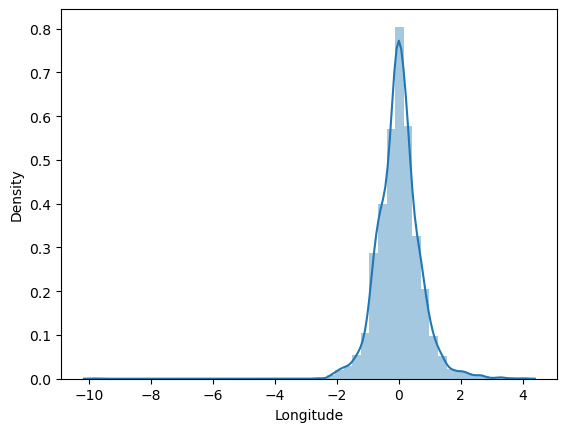

In [47]:
sns.distplot(y_test-prediction_lasso)

C:\Users\101ri\AppData\Local\Temp\ipykernel_4248\1693200975.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction_ridge)


<Axes: xlabel='Longitude', ylabel='Density'>

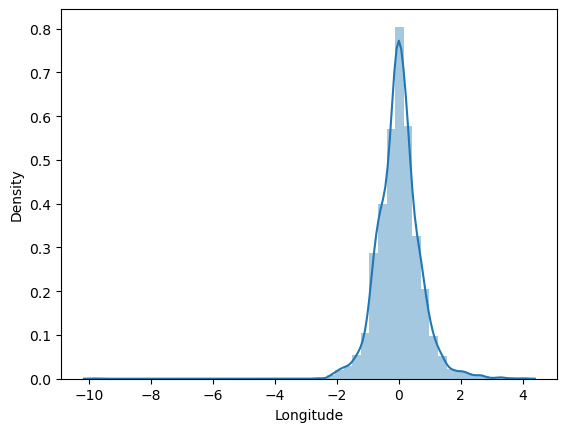

In [50]:
sns.distplot(y_test-prediction_ridge)

In [53]:
#for checking who has better performance we use r2

from sklearn.metrics import r2_score

In [54]:
r2_score(y_test,prediction_lasso)                 #y_test ==> actual 

0.882010219621501

In [56]:
r2_score(y_test,prediction_ridge) 

0.8820102196215007

In [57]:
##from the above lasso and ridge giving the same but most of the time give ridge better performance (0.75 >>0.71)

<Axes: ylabel='Longitude'>

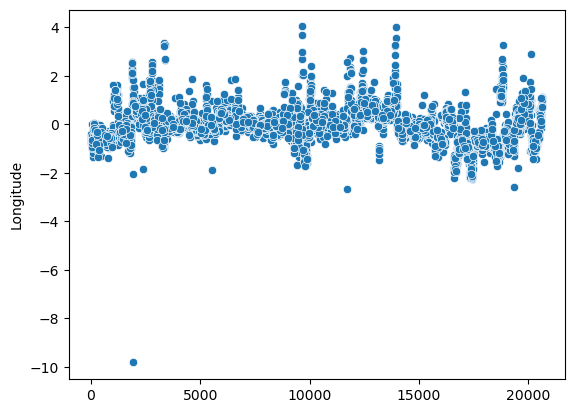

In [49]:
sns.scatterplot(y_test-prediction_lasso)